# House sales prices in King County

A project on exploratory data analysis.

Sebastian Thomas @ neue fische Bootcamp Data Science

# Part 6: Visualization

We visualize our major insights.

## Imports

### Modules, classes and functions

In [1]:
# python object persistence
import joblib

# data
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import shapefile as shp

# machine learning
from sklearn.pipeline import make_pipeline

### Helpers

We create a colormap from `lightgray` to `navy` for visualization.

In [2]:
# RGB of lightgray: 211, 211, 211
# RGB of navy: 0, 0, 128 

N = 256
reds = np.linspace(211/256, 0/256, N)
greens = np.linspace(211/256, 0/256, N)
blues = np.linspace(211/256, 128/256, N)
colors = np.column_stack((reds, greens, blues, np.ones(N)))
lightgray_to_navy = ListedColormap(colors)

### Preprocessor objects

We import the preprocessor objects constructed earlier.

In [3]:
preprocessor_clean = joblib.load('objects/preprocessor_clean.joblib')
preprocessor_engineer = joblib.load('objects/preprocessor_engineer.joblib')
preprocessor = make_pipeline(preprocessor_clean, preprocessor_engineer)

### Data

We import the data and preprocess it.

In [4]:
houses = pd.read_pickle('data/king_county.pickle')
houses = preprocessor.transform(houses)

## Visualization of major insights

### Distribution of target `'price'`

The distribution of the house sales price is left modal around a median of approximately half a million US-Dollars, with some outliers up to almost 8 million US-Dollar.

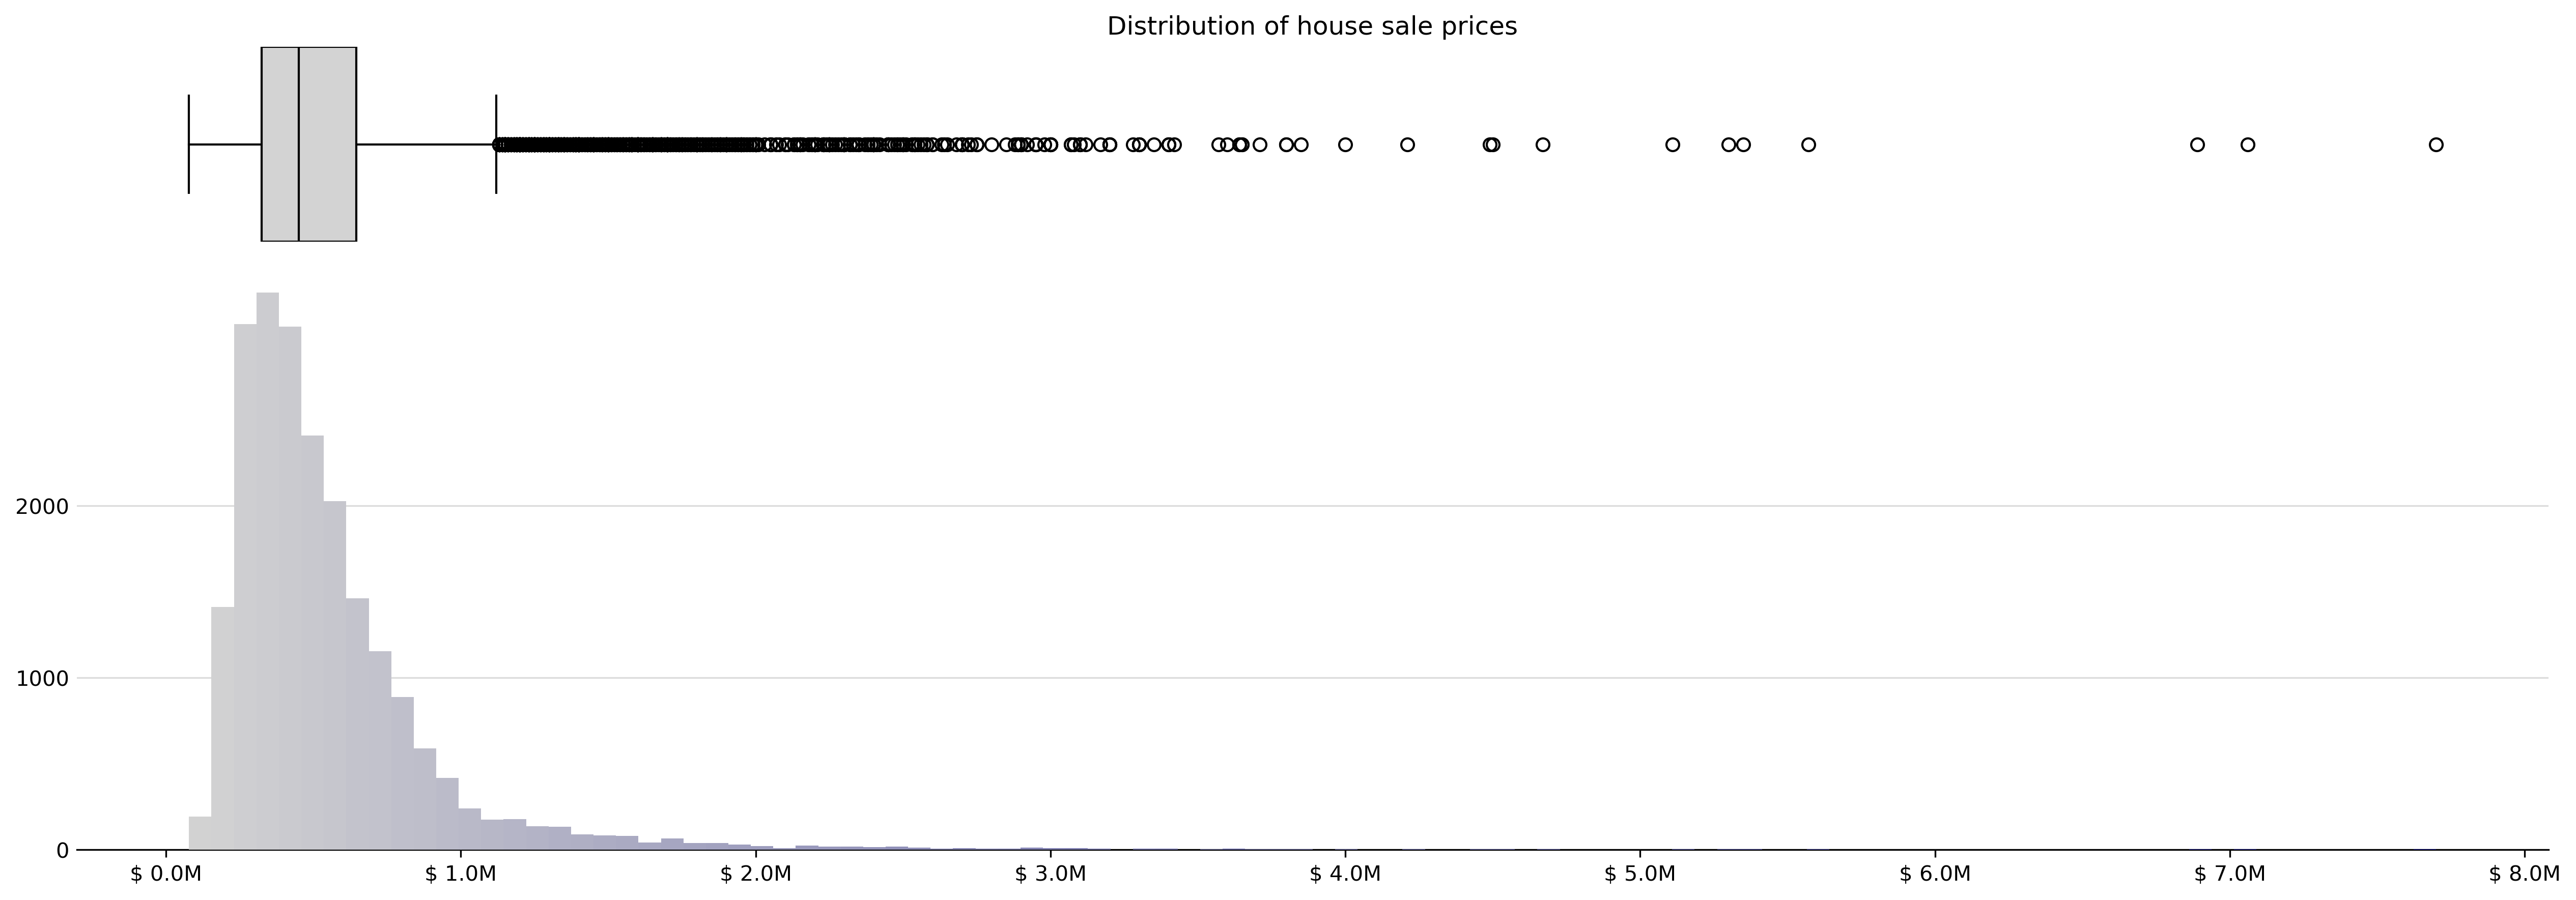

In [5]:
(_, (ax1, ax2)) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]}, sharex=True, figsize=(17, 6),
                               dpi=300)

ax1.boxplot(houses['price'], vert=False, widths=1., patch_artist=True, boxprops={'facecolor': 'lightgray'},
            medianprops={'color': 'black'})
ax1.set_title('Distribution of house sale prices')
ax1.set_xticks(np.arange(9)*10**6)
ax1.set_xticklabels(['$ {:.1f}M'.format(xtick/10**6) for xtick in ax1.get_xticks()])
ax1.get_xaxis().set_tick_params(length=0)
ax1.get_yaxis().set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.grid(axis='y', color='gainsboro', zorder=0)
(_, bins, patches) = ax2.hist(houses['price'], bins=100, color='navy', zorder=3)
ax2.set_xticks(np.arange(9)*10**6)
ax2.set_yticks(np.arange(3)*10**3)
ax2.set_xticklabels(['$ {:.1f}M'.format(xtick/10**6) for xtick in ax2.get_xticks()])
ax2.get_yaxis().set_tick_params(length=0)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# color
bin_centers = 0.5 * (bins[:-1] + bins[1:])
# min-max-scale values to interval [0, 1]
shares = (bin_centers - np.min(bin_centers)) / (np.max(bin_centers) - np.min(bin_centers))

for share, patch in zip(shares, patches):
    plt.setp(patch, 'facecolor', lightgray_to_navy(share))

plt.tight_layout()
plt.savefig('figures/price.png', bbox_inches='tight', pad_inches=0)
plt.savefig('figures/price.svg', bbox_inches='tight', pad_inches=0)
plt.show()

The distributions for `'sqft_living'`, `'sqft_above'`, `'sqft_lot'`, `'sqft_living15'`, `'sqft_lot15'`, `'bedrooms'`, `'bathrooms'` look similar.

### Impact of location

We visualize the impact of the location on the house sales price. Highest sales prices are achieved in Seattle. There is one zipcode (`98039`) where the sale prices are much higher than in the other areas.

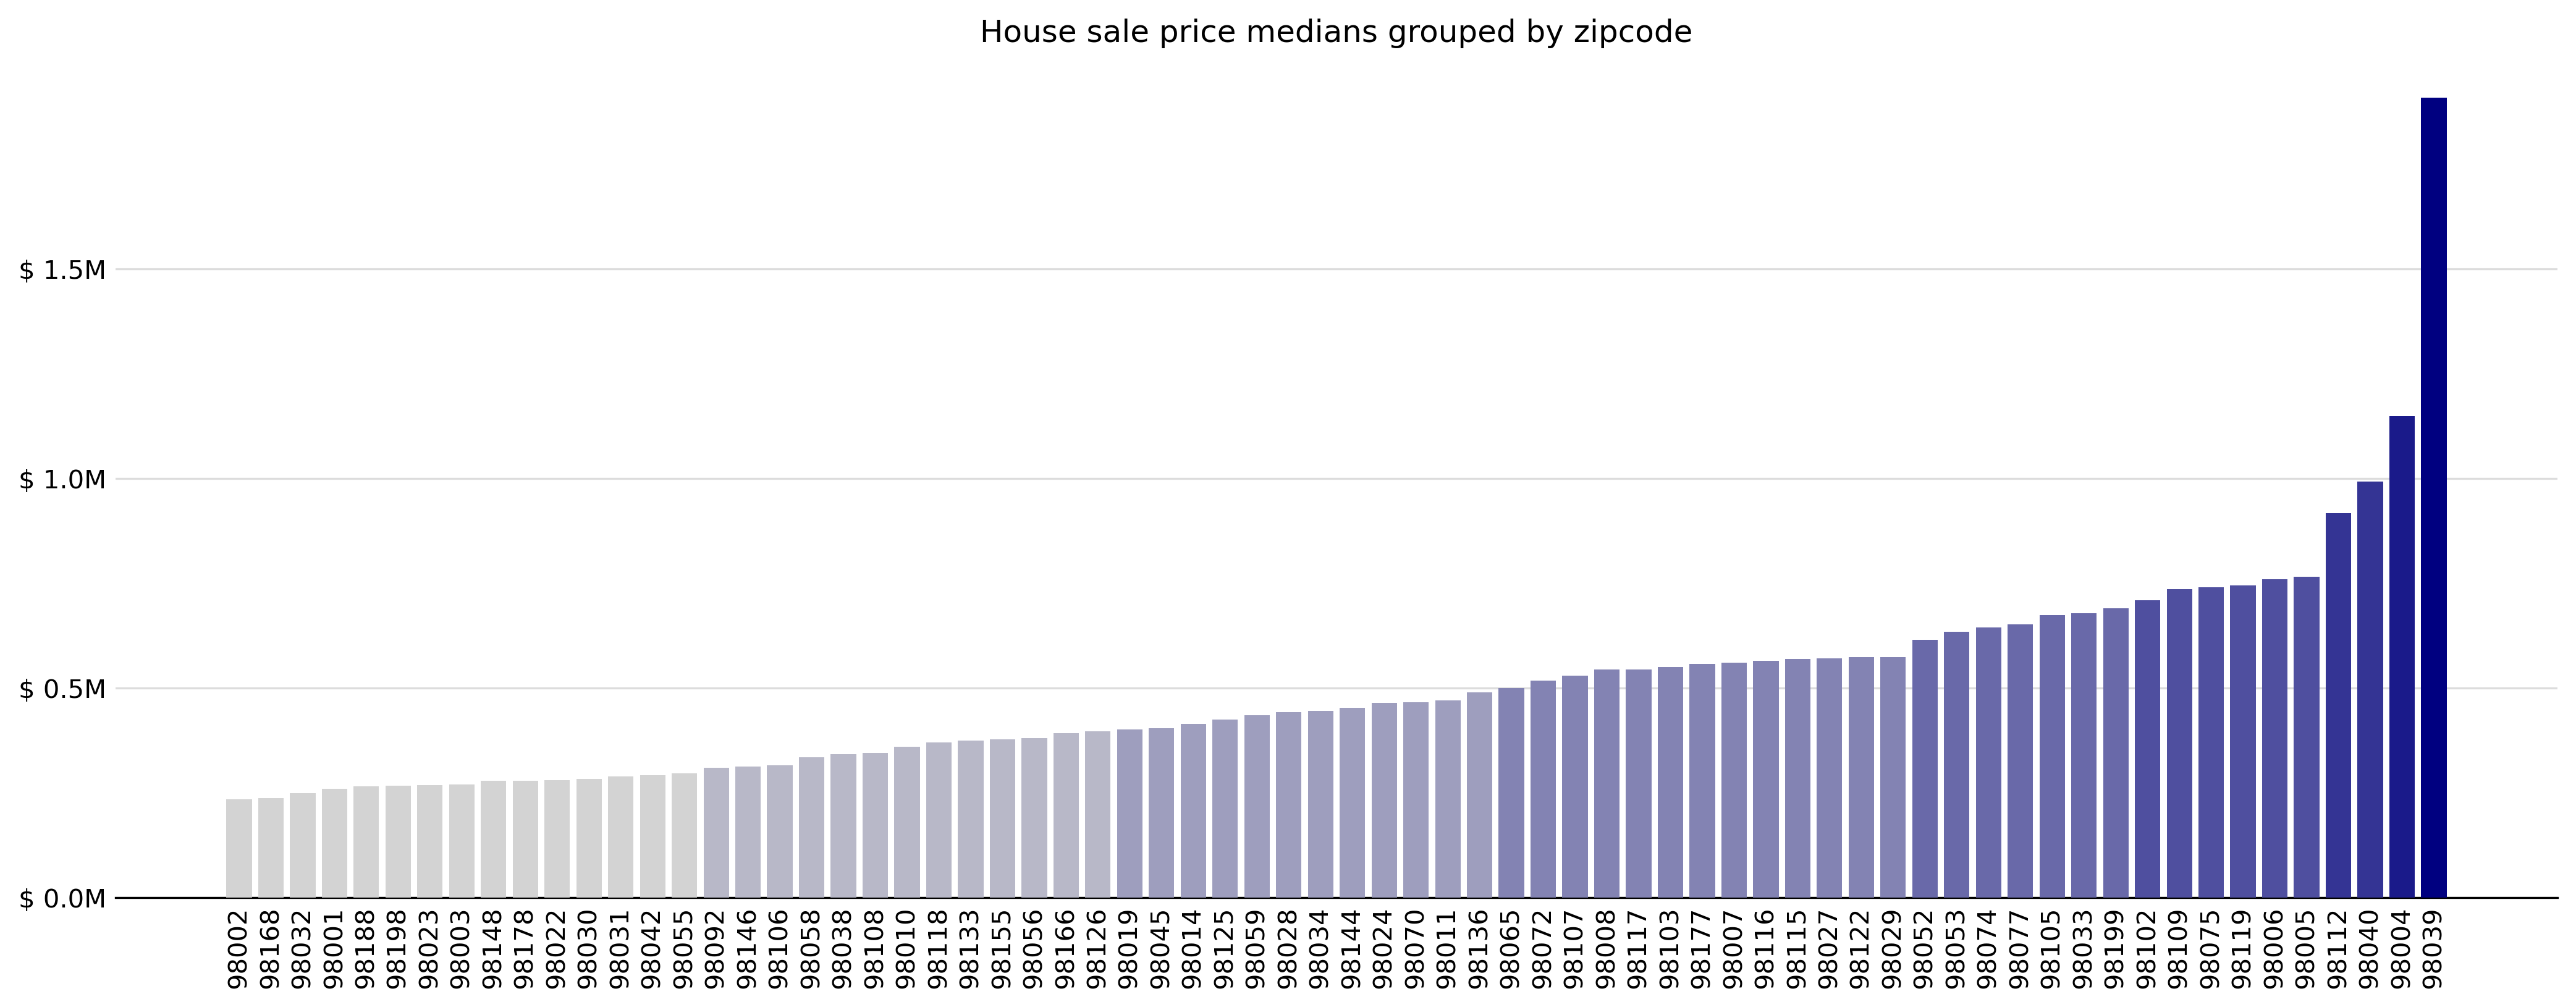

In [6]:
price_medians_by_zipcode = houses.groupby('zipcode')['price'].median().sort_values()

# colors according to zipcode cats
zipcode_colors = (houses.groupby('zipcode')['price'].median()/100000).sort_values().astype('int').map({
    2:  '#D3D3D3',
    3:  '#B8B8C8',
    4:  '#9E9EBE',
    5:  '#8383B3',
    6:  '#6969A9',
    7:  '#4F4F9F',
    9:  '#343494',
    11: '#1A1A8A',
    19: '#000080'
}).to_dict()

plt.figure(figsize=(17, 6), dpi=300)
ax = plt.axes()

ax.grid(axis='y', color='gainsboro', zorder=0)
ax.bar(range(price_medians_by_zipcode.size), price_medians_by_zipcode,
       color=[zipcode_colors[zipcode] for zipcode in price_medians_by_zipcode.index], zorder=3)
ax.set_title('House sale price medians grouped by zipcode')
ax.set_xticks(range(price_medians_by_zipcode.size))
ax.set_yticks(np.array([0.0, 0.5, 1.0, 1.5])*10**6)
ax.set_xticklabels(price_medians_by_zipcode.index, rotation=90)
ax.set_yticklabels(['$ {:.1f}M'.format(ytick/10**6) for ytick in ax.get_yticks()])
ax.get_xaxis().set_tick_params(length=0)
ax.get_yaxis().set_tick_params(length=0)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('figures/zipcode.png', bbox_inches='tight', pad_inches=0)
plt.savefig('figures/zipcode.svg', bbox_inches='tight', pad_inches=0)
plt.show()

To visualize the zipcode areas on a map, we use a shapefile found at https://gis-kingcounty.opendata.arcgis.com/datasets/zipcodes-for-king-county-and-surrounding-area-zipcode-area/data.

In [7]:
kc = shp.Reader('data/zipcodes/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.shp')

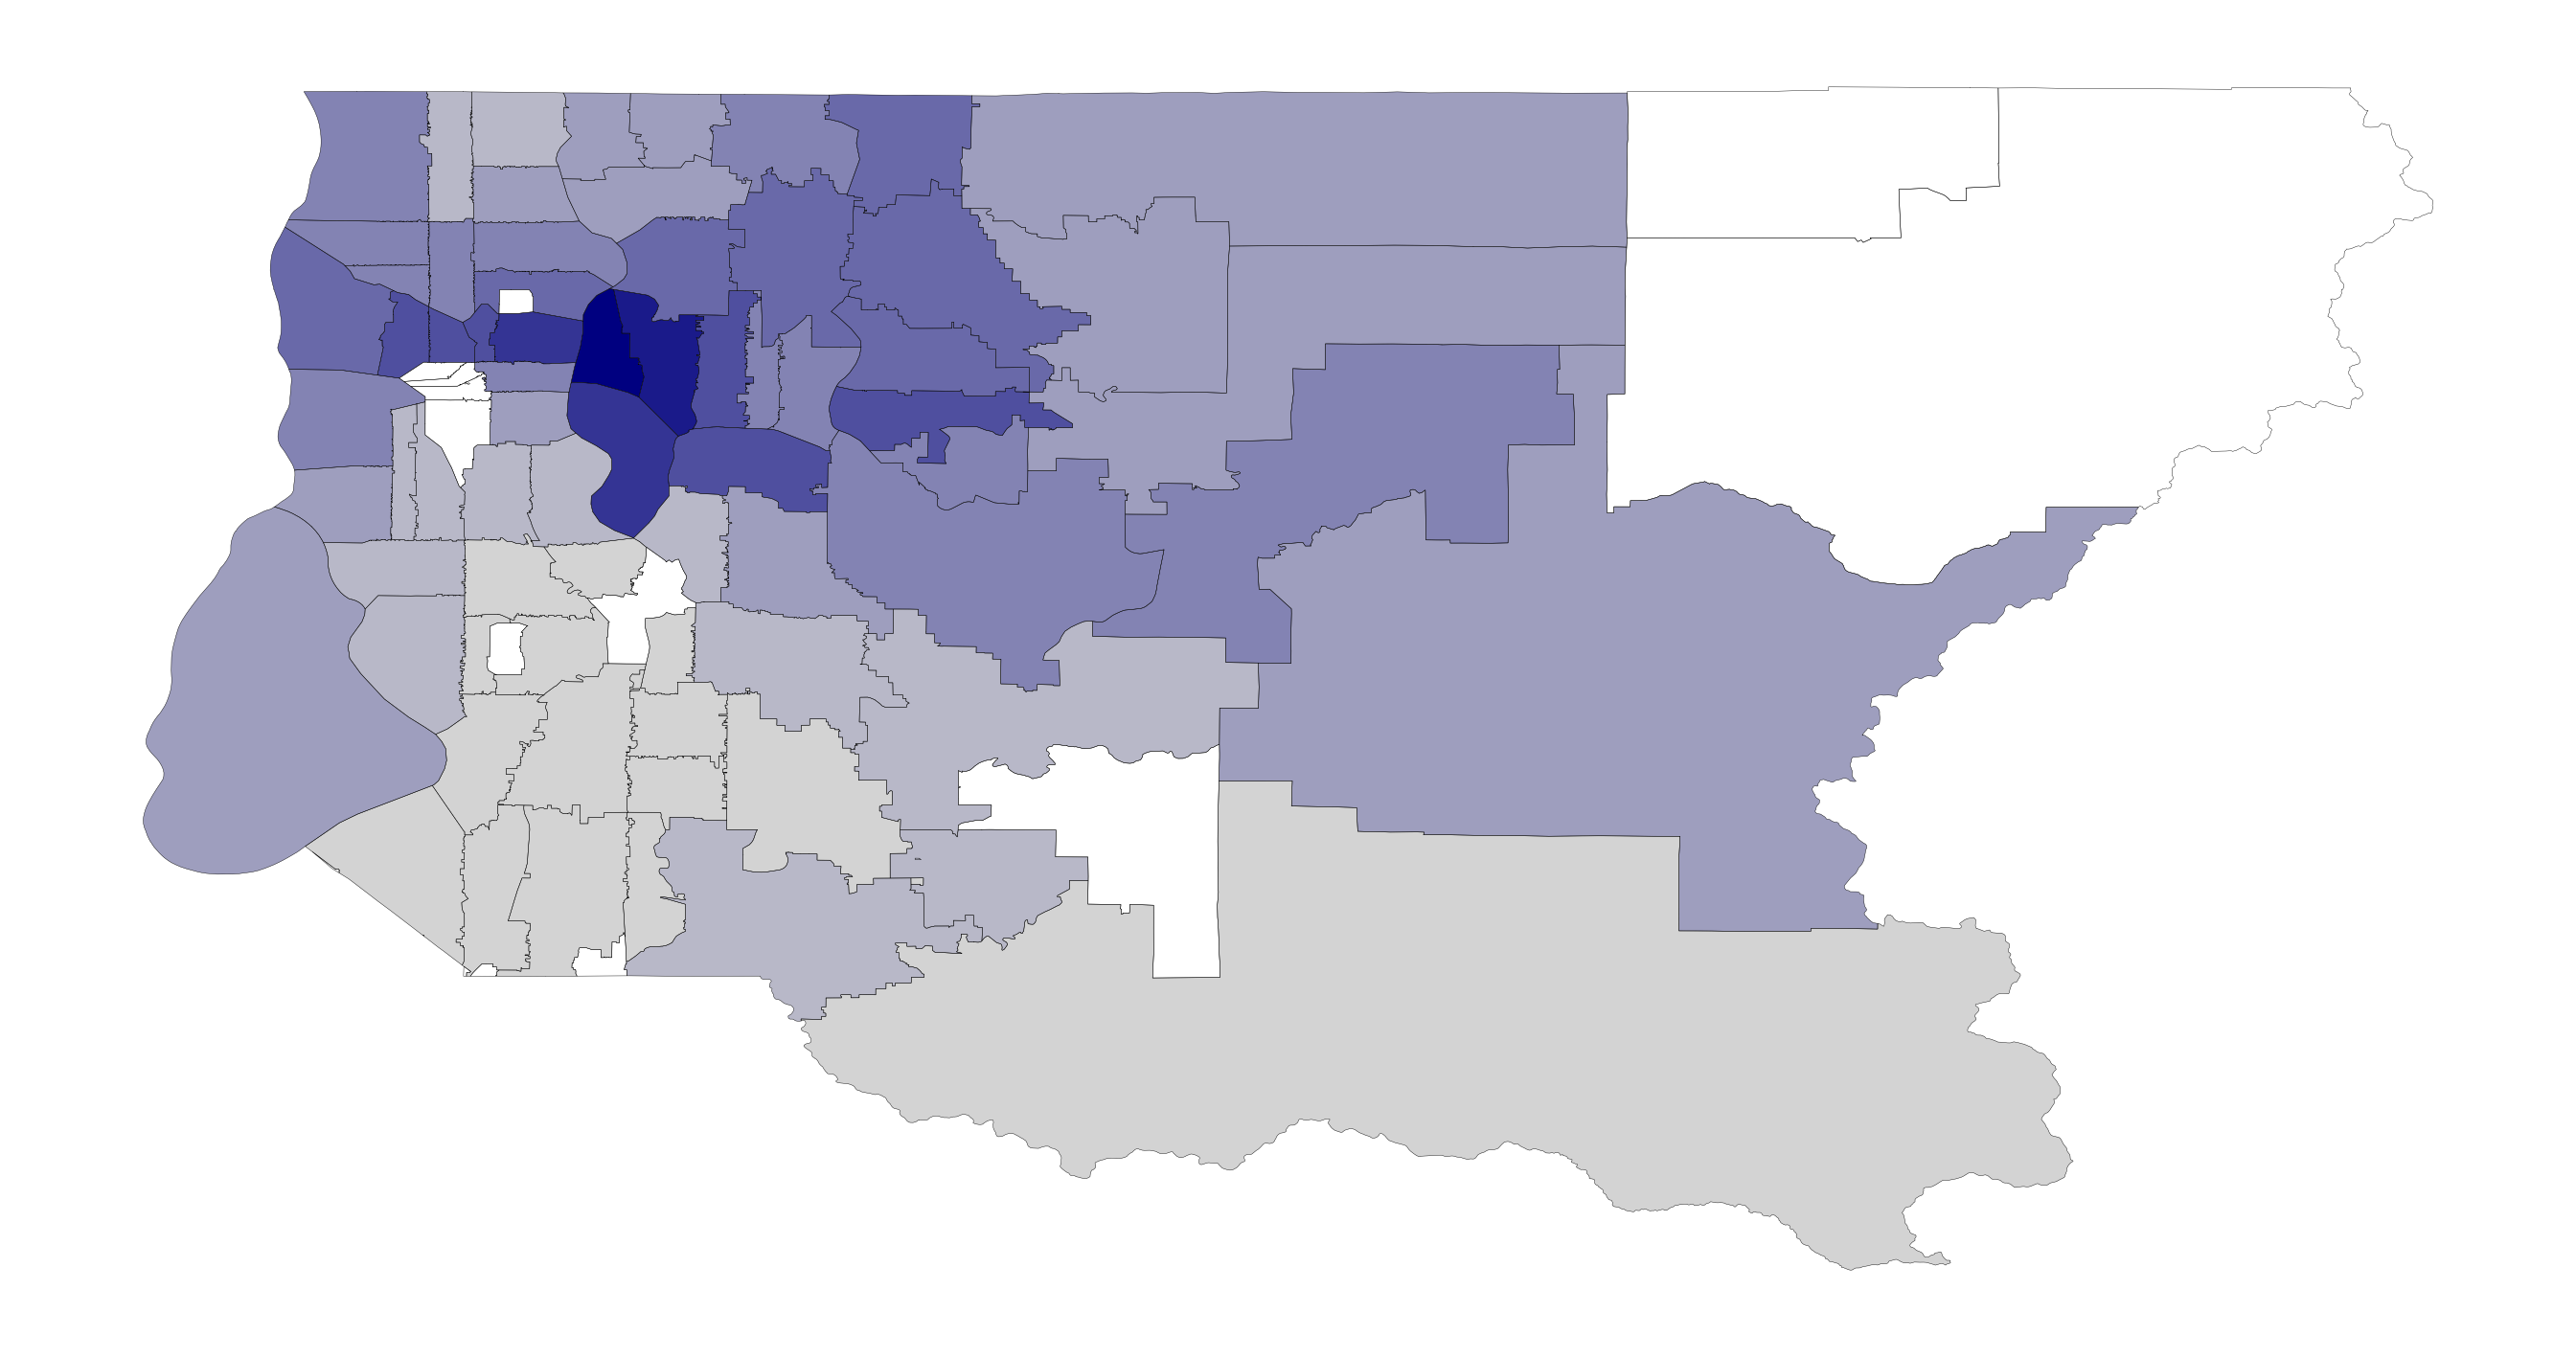

In [8]:
fig = plt.figure(figsize=(17, 6), dpi=300)
ax = plt.axes()
ax.set_aspect(110.54/(-111.320*np.cos(houses['lat'].mean())))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# plot shapes
for shape_record in kc.shapeRecords():
    # check if the entry is from King County
    if shape_record.record['COUNTY'] == '033':
        geo_data = shape_record.shape.__geo_interface__
        zipcode = shape_record.record['ZIP']
        if geo_data['type'] == 'Polygon':
            (x, y) = zip(*geo_data['coordinates'][0])
            ax.plot(x, y, 'black', linewidth=0.1)
            ax.fill(x, y, zipcode_colors.get(zipcode, '#FFFFFF'))
        elif geo_data['type'] == 'MultiPolygon':
            for polygon in geo_data['coordinates']:
                (x, y) = zip(*polygon[0])
                ax.plot(x, y, 'black', linewidth=0.1)
                ax.fill(x, y, zipcode_colors.get(zipcode, '#FFFFFF'))

plt.savefig('figures/zipcode_map.png', bbox_inches='tight', pad_inches=0)
plt.savefig('figures/zipcode_map.svg', bbox_inches='tight', pad_inches=0)
plt.show()

### Impact of living space

There is rough linear relationship between the living space area and the house sales price.

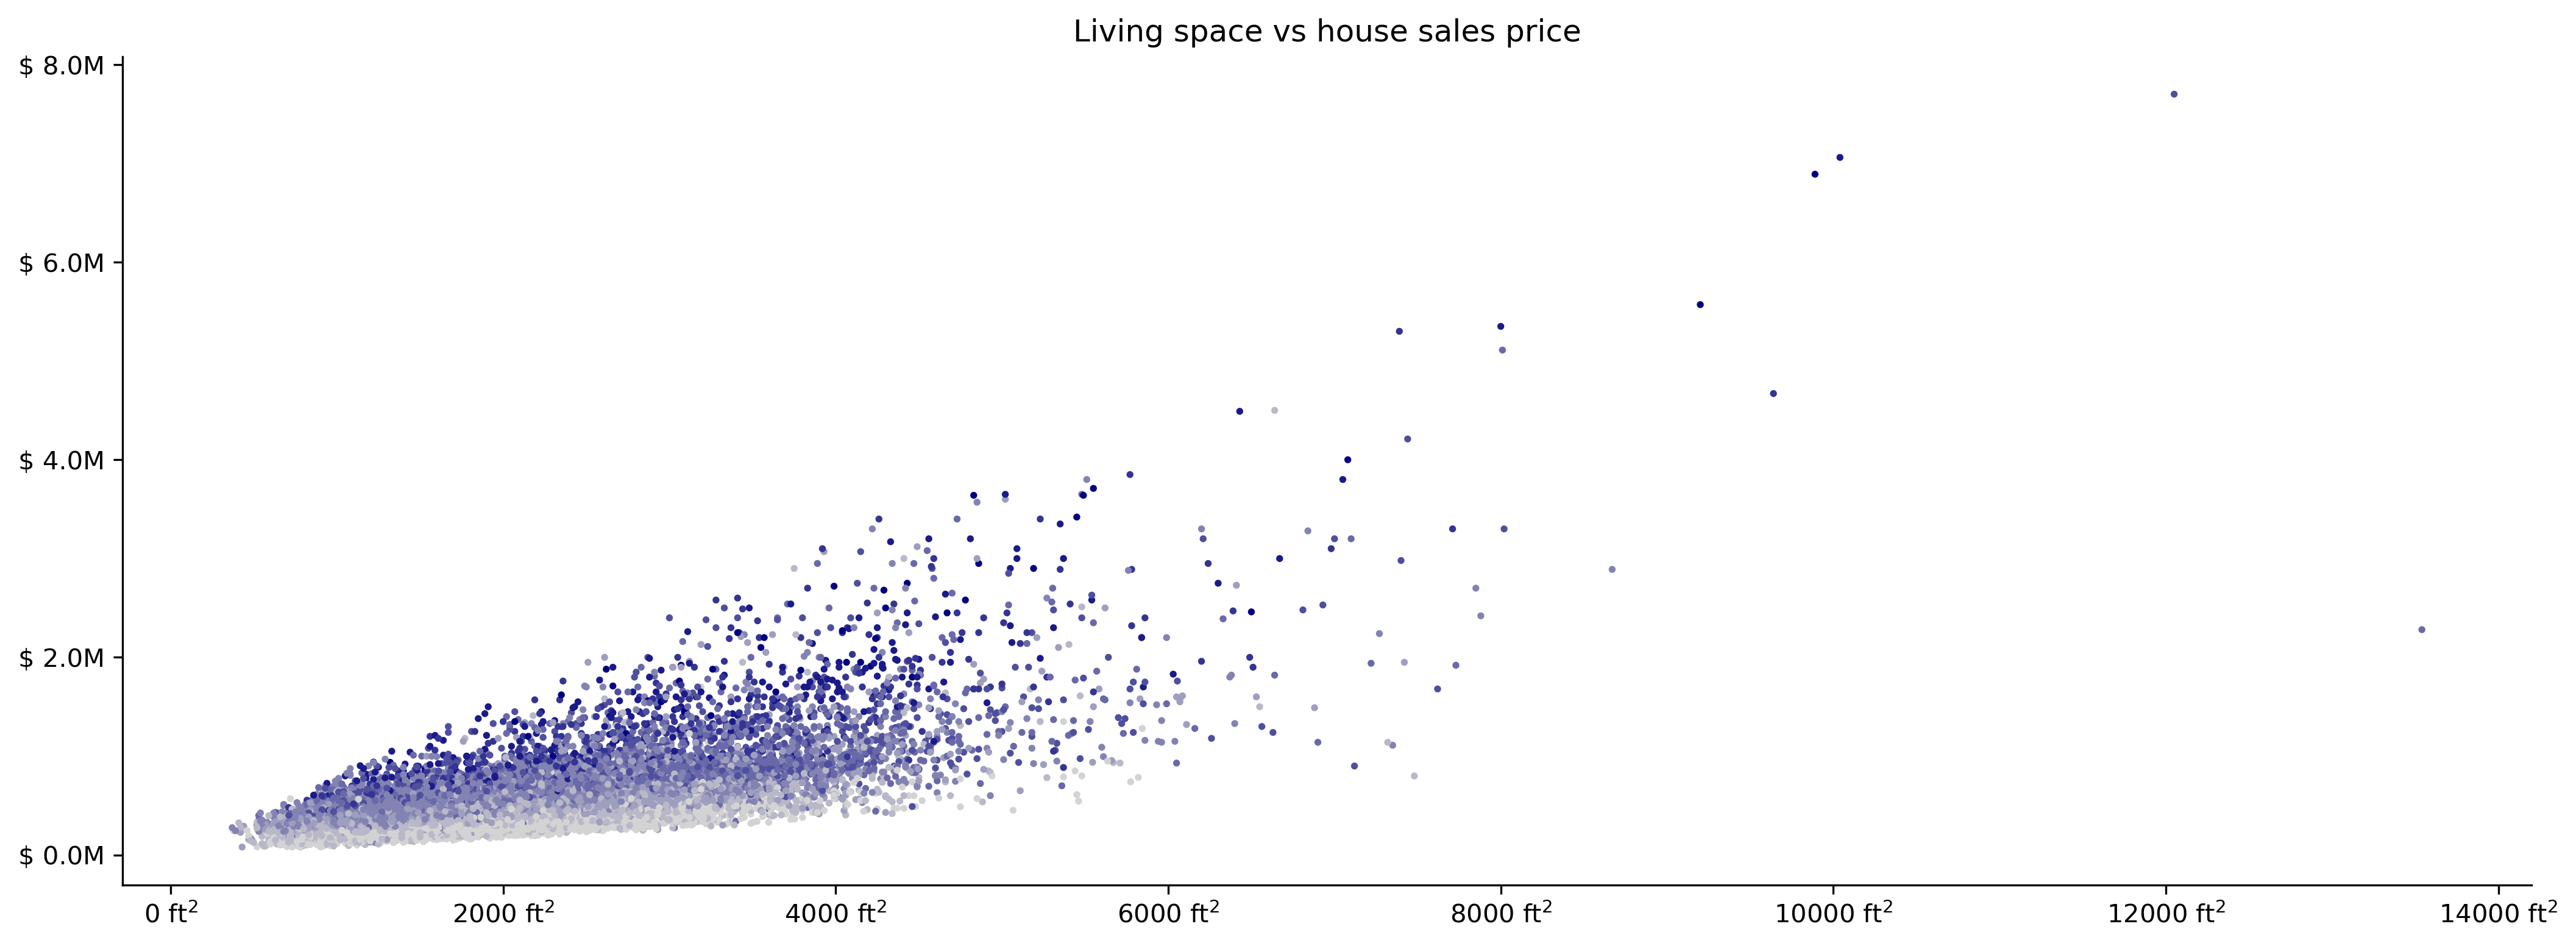

In [9]:
plt.figure(figsize=(17, 6), dpi=300)
ax = plt.axes()

colors = (houses.groupby('zipcode')['price'].median()/100000).sort_values().astype('int').map({
    2:  '#D3D3D3',
    3:  '#B8B8C8',
    4:  '#9E9EBE',
    5:  '#8383B3',
    6:  '#6969A9',
    7:  '#4F4F9F',
    9:  '#343494',
    11: '#1A1A8A',
    19: '#000080'
}).to_dict()
c = houses['zipcode'].map(colors)

sc = ax.scatter(houses['sqft_living'], houses['price'], c=c, s=3)
ax.set_title('Living space vs house sales price')
ax.set_yticks(np.arange(0, 9, 2)*10**6)
ax.set_xticklabels(['{} ft$^2$'.format(int(xtick)) for xtick in ax.get_xticks()])
ax.set_yticklabels(['$ {:.1f}M'.format(ytick/10**6) for ytick in ax.get_yticks()])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('figures/living_space.png', bbox_inches='tight', pad_inches=0)
plt.savefig('figures/living_space.svg', bbox_inches='tight', pad_inches=0)
plt.show()

### Impact of quality

While there is a rough linear relationship between house condition and the house sales price, the quality of the interior (design/materials) has an exponential impact on the house sales price.

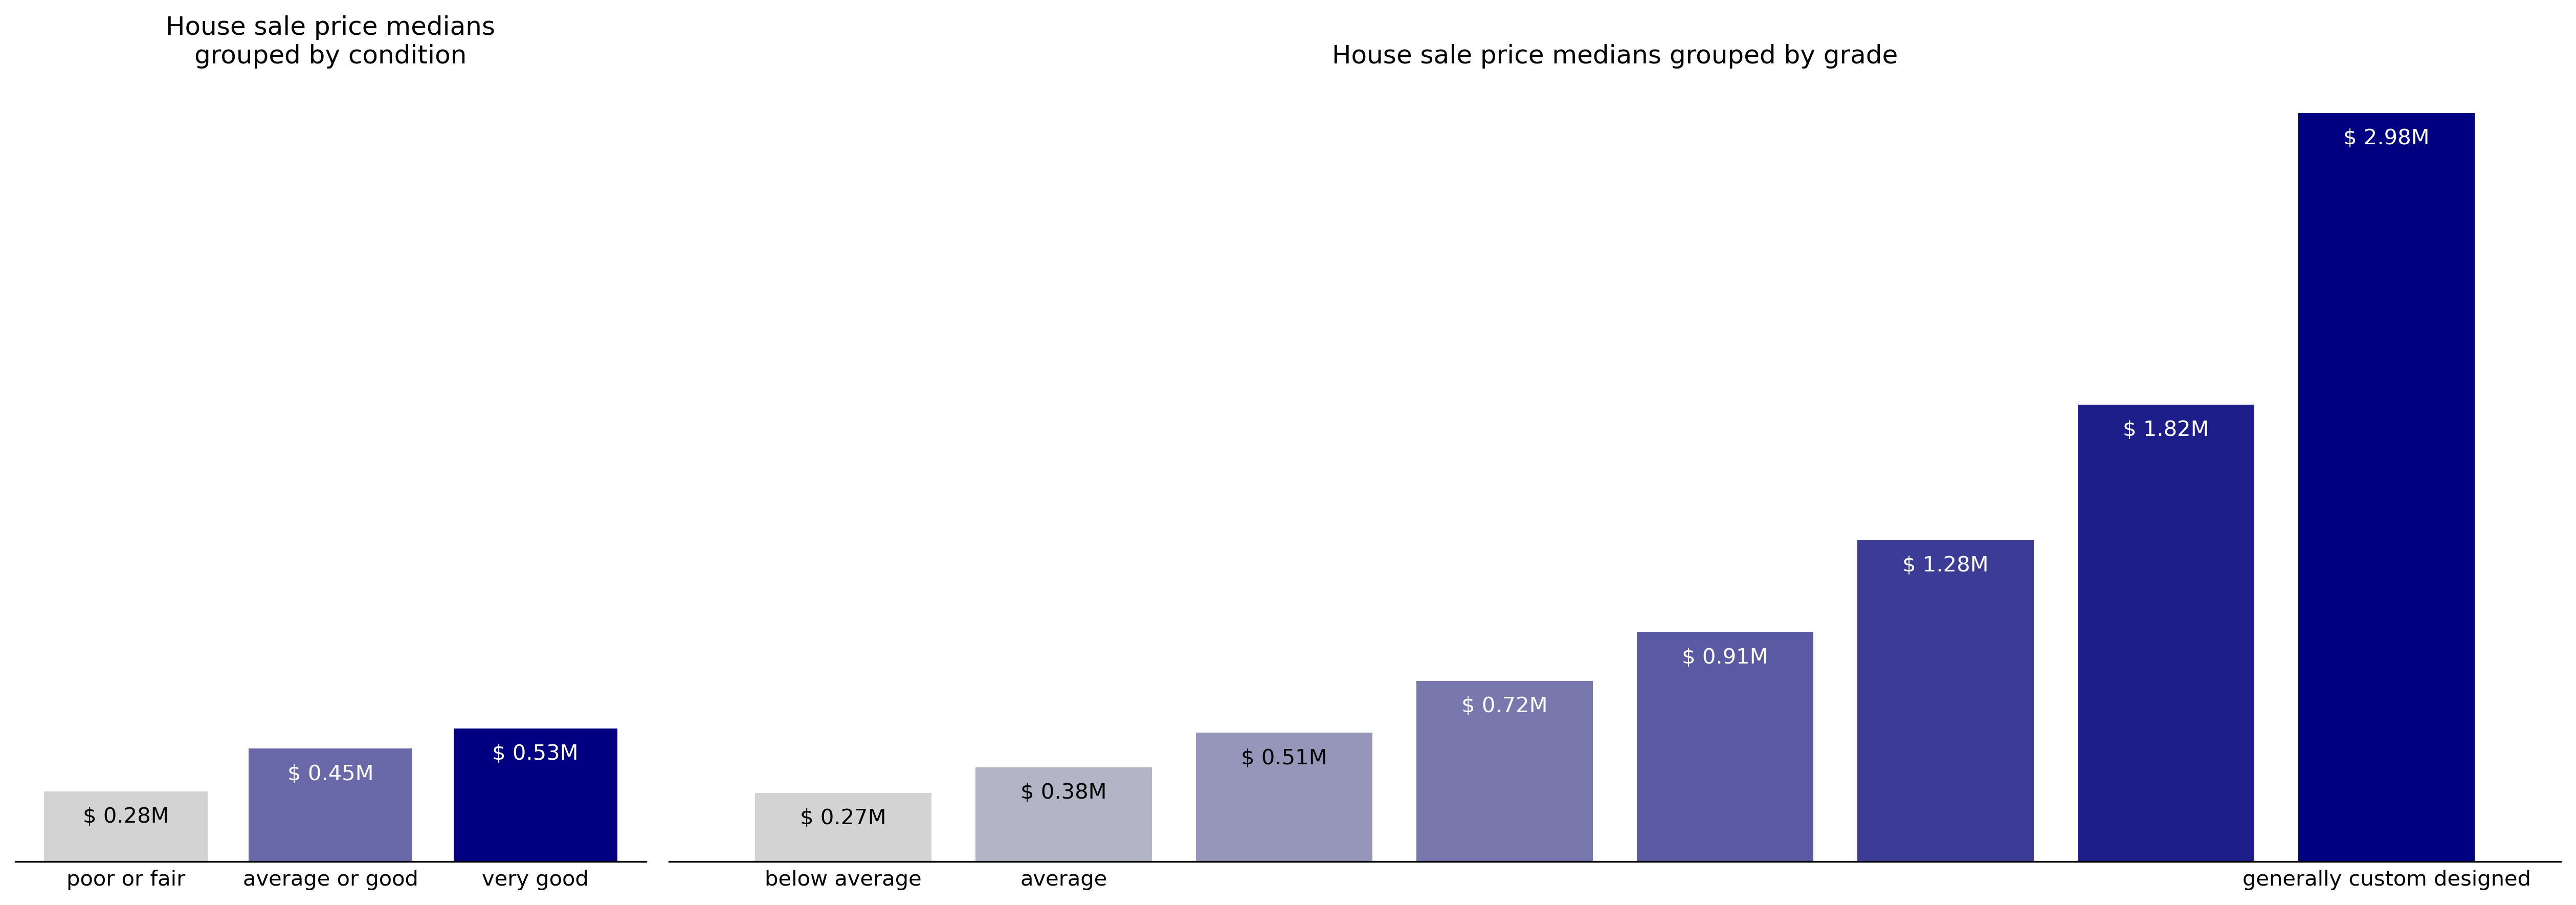

In [10]:
price_medians_by_condition = houses.groupby('condition bin')['price'].median()
price_medians_by_grade = houses.groupby('grade bin')['price'].median()

(_, (ax1, ax2)) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3]}, sharey=True, figsize=(17, 6),
                               dpi=300)

bars = ax1.bar(range(price_medians_by_condition.size), price_medians_by_condition,
               color=['#D3D3D3', '#6969A9', '#000080']) # gradient from lightgray to navy
ax1.set_title('House sale price medians\ngrouped by condition')
ax1.set_xticks(range(price_medians_by_condition.size))
ax1.set_xticklabels(['poor or fair', 'average or good', 'very good'])
ax1.get_xaxis().set_tick_params(length=0)
ax1.get_yaxis().set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# annotate values
for bar, value, color in zip(bars, price_medians_by_condition, ['black', 'white', 'white']):
    ax1.annotate('$ {:.2f}M'.format(value/10**6), xy=(bar.get_x() + bar.get_width() / 2, value),
                 xytext=(0, -7), textcoords='offset points', color=color, ha='center', va='top')

bars = ax2.bar(range(price_medians_by_grade.size), price_medians_by_grade,
               color=['#D3D3D3', '#B4B4C7', '#9696BB', '#7878AF', '#5A5AA3', '#3C3C97', '#1E1E8B',
                      '#000080']) # gradient from lightgray to navy
ax2.set_title('House sale price medians grouped by grade')
ax2.set_xticks(range(price_medians_by_grade.size))
ax2.set_xticklabels(['below average', 'average', '', '', '', '', '', 'generally custom designed'])
ax2.get_xaxis().set_tick_params(length=0)
ax2.get_yaxis().set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# annotate values
for bar, value, color in zip(bars, price_medians_by_grade,
                             ['black', 'black', 'black', 'white', 'white', 'white', 'white', 'white']):
    ax2.annotate('$ {:.2f}M'.format(value/10**6), xy=(bar.get_x() + bar.get_width() / 2, value),
                 xytext=(0, -7), textcoords='offset points', color=color, ha='center', va='top')

plt.tight_layout()
plt.savefig('figures/condition_grade.png', bbox_inches='tight', pad_inches=0)
plt.savefig('figures/condition_grade.svg', bbox_inches='tight', pad_inches=0)
plt.show()

### Impact of view

The indicator for the view(s) is relevant, the higher the view, the higher the sales price. Most properties don't have an extraordinary view.

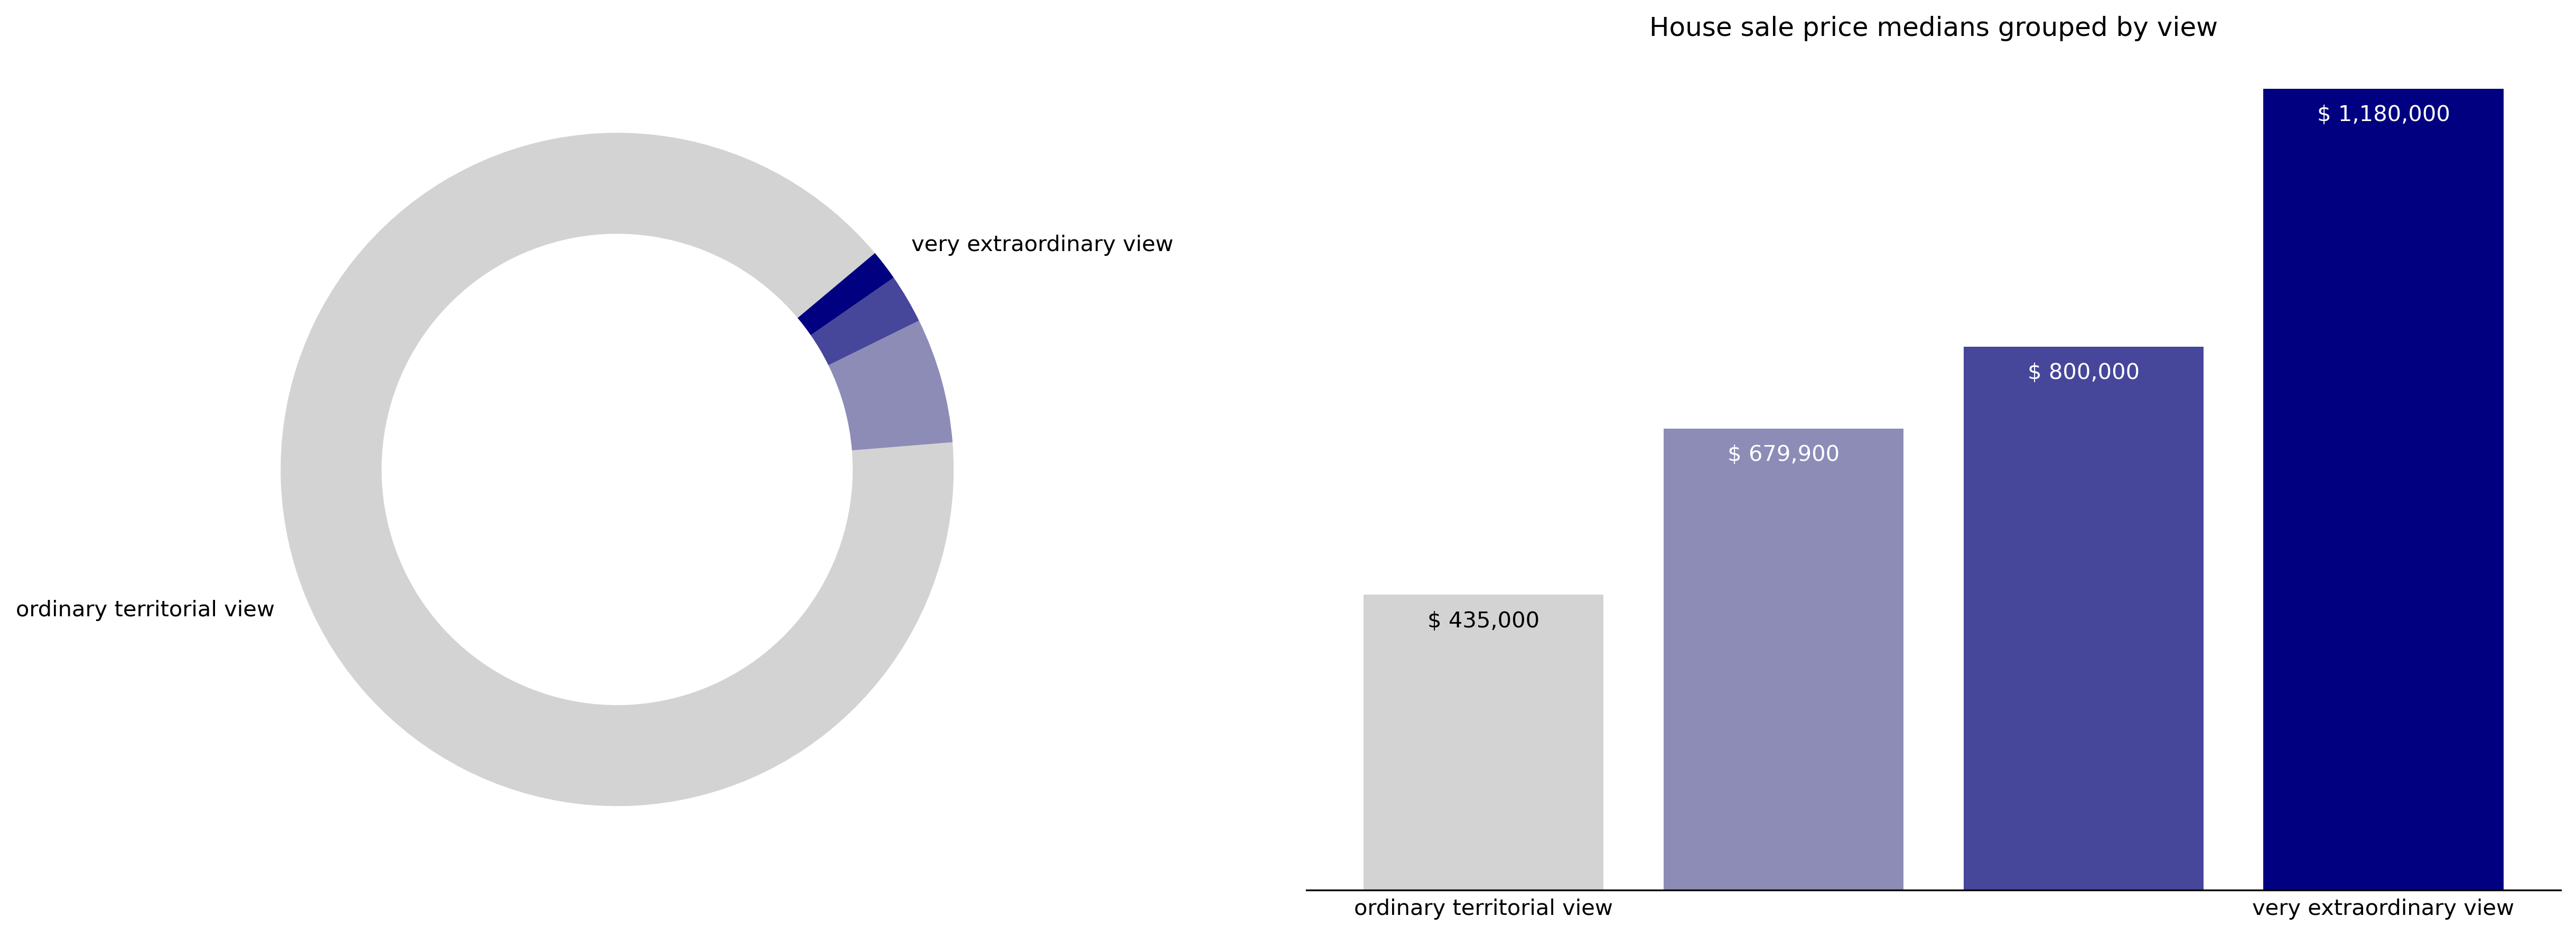

In [11]:
view_counts = houses['view bin'].value_counts()
view_frequencies = view_counts / view_counts.sum()
price_medians_by_view = houses.groupby('view bin')['price'].median()

labels = ['ordinary territorial view', '', '', 'very extraordinary view']
colors = ['#D3D3D3', '#8C8CB7', '#46469B', '#000080'] # gradient from lightgray to navy

(_, (ax1, ax2)) = plt.subplots(1, 2, figsize=(17, 6), dpi=300)

wedges, _ = ax1.pie(view_counts, labels=labels, wedgeprops={'width': 0.3}, startangle=40, colors=colors)

bars = ax2.bar(range(price_medians_by_view.size), price_medians_by_view, color=colors)
ax2.set_title('House sale price medians grouped by view')
ax2.set_xticks(range(price_medians_by_view.size))
ax2.set_xticklabels(labels)
ax2.get_xaxis().set_tick_params(length=0)
ax2.get_yaxis().set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# annotate values
for bar, value, color in zip(bars, price_medians_by_view, ['black', 'white', 'white', 'white']):
    ax2.annotate('$ {:,}'.format(int(value)), xy=(bar.get_x() + bar.get_width() / 2, value),
                 xytext=(0, -7), textcoords='offset points', color=color, ha='center', va='top')

plt.tight_layout()
plt.savefig('figures/view.png', bbox_inches='tight', pad_inches=0)
plt.savefig('figures/view.svg', bbox_inches='tight', pad_inches=0)
plt.show()

### Impact of waterfront

If the house is on a waterfront, the median price increases about 1 million.

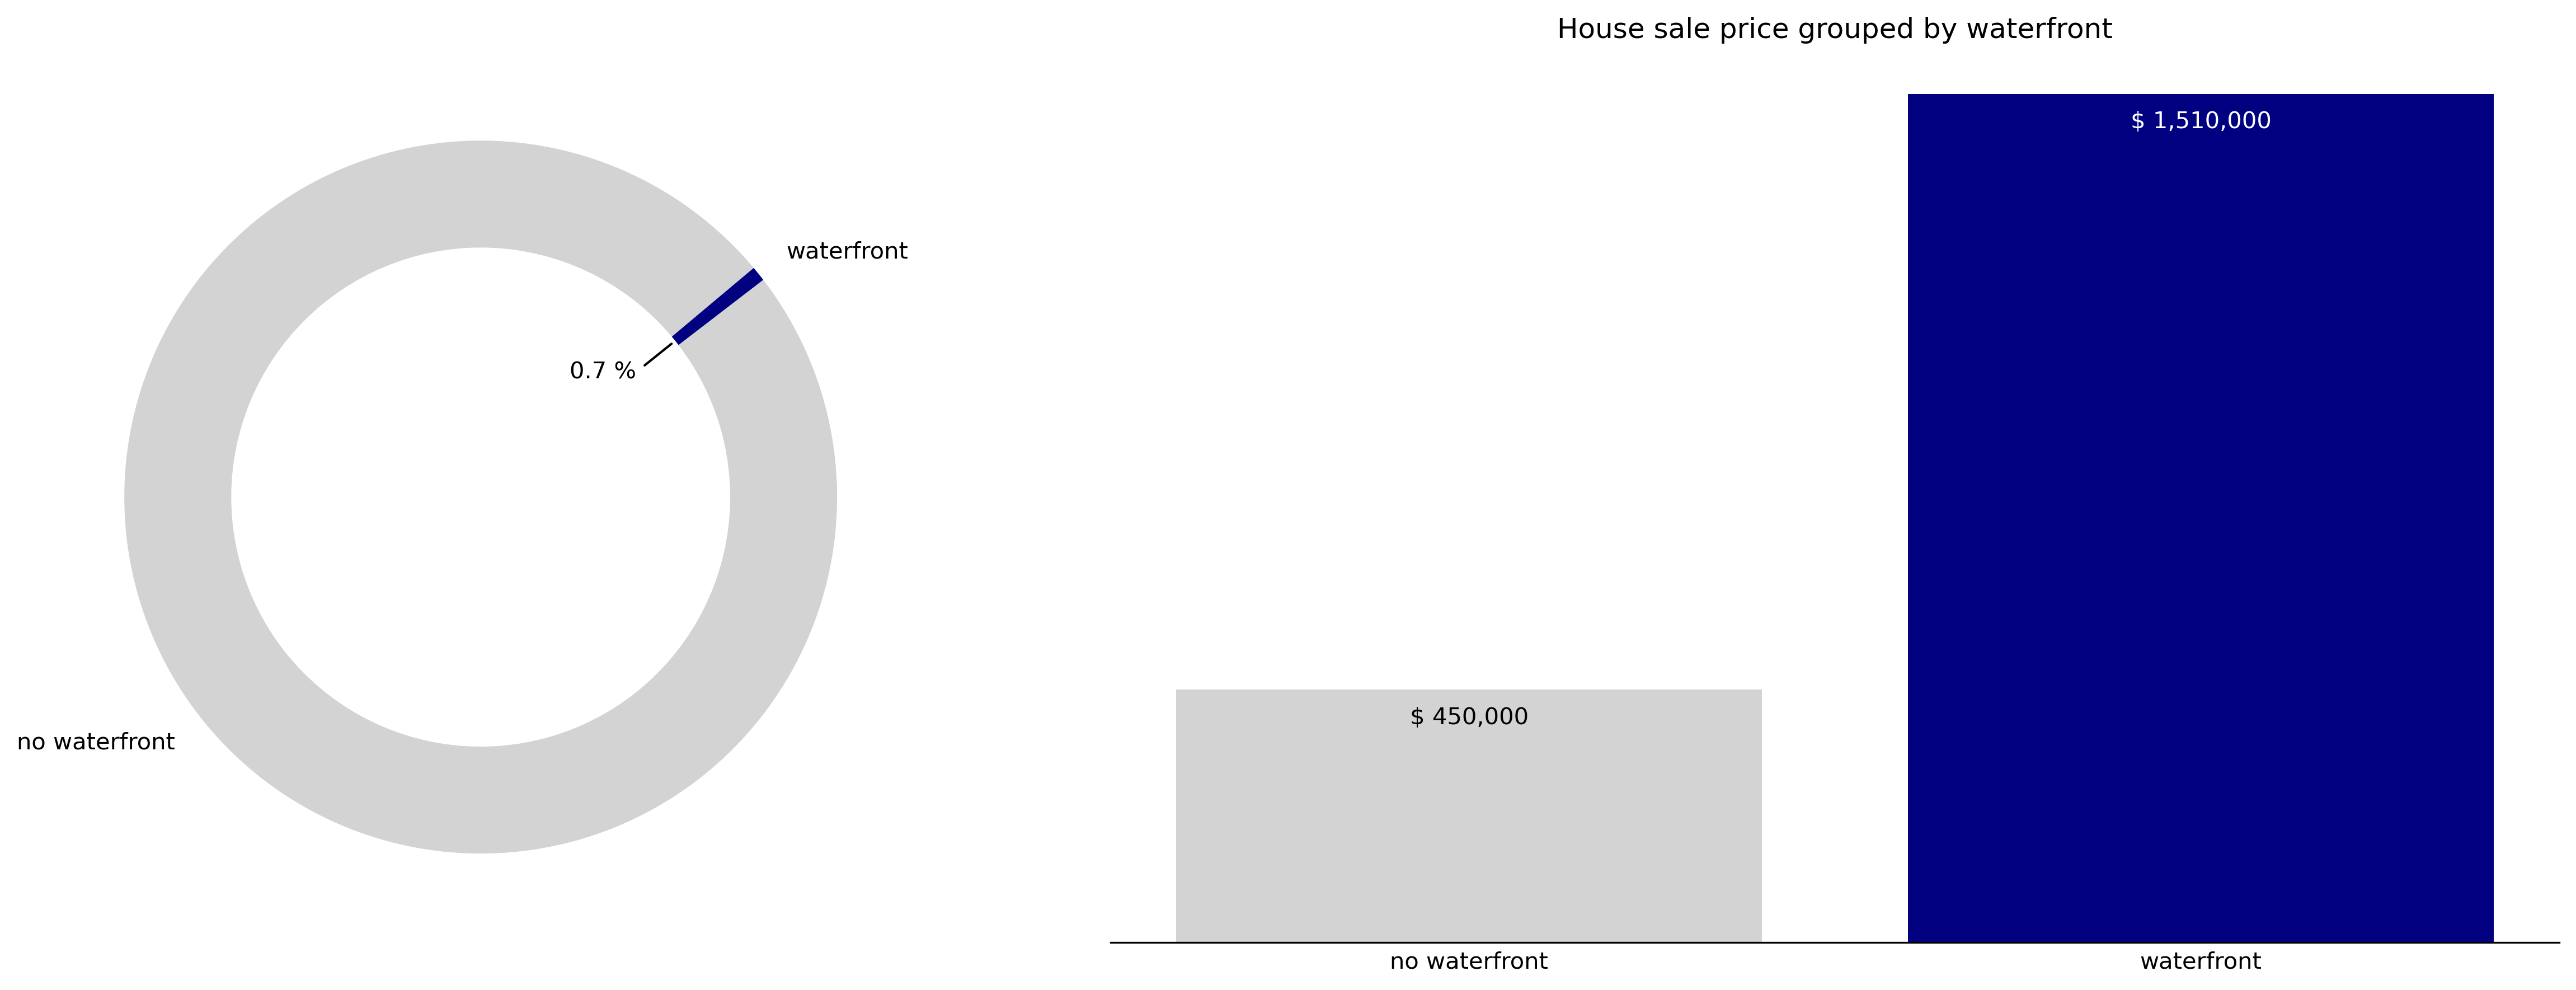

In [12]:
waterfront_counts = houses['waterfront'].value_counts()
waterfront_frequencies = waterfront_counts / waterfront_counts.sum()
price_medians_by_waterfront = houses.groupby('waterfront')['price'].median()

labels = ['no waterfront', 'waterfront']
colors = ['lightgray', 'navy']

(_, (ax1, ax2)) = plt.subplots(1, 2, figsize=(17, 6), dpi=300)

wedges, _ = ax1.pie(waterfront_counts, labels=labels, wedgeprops={'width': 0.3}, startangle=40, 
                    colors=colors)

width = wedges[1].width
angle = (wedges[1].theta1 + wedges[1].theta2)/2.
angle_rad = np.deg2rad(angle)
x = np.cos(angle_rad)*(1. - width)
y = np.sin(angle_rad)*(1. - width)
ax1.annotate('{:.1f} %'.format(waterfront_frequencies[True]*100), xy=(x, y), 
             xytext=(0.8*x, 0.8*y), horizontalalignment='right',
             arrowprops={'arrowstyle': '-', 'connectionstyle': 'angle,angleA=0,angleB={}'.format(angle)},
             ha='right', va='center')

bars = ax2.bar(range(price_medians_by_waterfront.size), price_medians_by_waterfront, color=colors)
ax2.set_title('House sale price grouped by waterfront')
ax2.set_xticks(range(price_medians_by_waterfront.size))
ax2.set_xticklabels(labels)
ax2.get_xaxis().set_tick_params(length=0)
ax2.get_yaxis().set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# annotate values
for bar, value, color in zip(bars, price_medians_by_waterfront, ['black', 'white']):
    ax2.annotate('$ {:,}'.format(int(value)), xy=(bar.get_x() + bar.get_width() / 2, value),
                 xytext=(0, -7), textcoords='offset points', color=color, ha='center', va='top')

plt.tight_layout()
plt.savefig('figures/waterfront.png', bbox_inches='tight', pad_inches=0)
plt.savefig('figures/waterfront.svg', bbox_inches='tight', pad_inches=0)
plt.show()